In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [3]:
df = pd.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


### Model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='churn'), df.churn, test_size=0.1, 
                                                   shuffle=True, stratify=df.churn, 
                                                   random_state=4)

In [7]:
tree_pipe = Pipeline([('scaler', RobustScaler()), ('decision_tree', DecisionTreeClassifier())])
logistic_pipe = Pipeline([('scaler', RobustScaler()), ('logistic', LogisticRegression())])

tree_pipe.fit(X_train, y_train)
logistic_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('logistic', LogisticRegression())])

In [8]:
tree_y_pred = tree_pipe.predict(X_test)
logistic_y_pred = logistic_pipe.predict(X_test)

In [10]:
tree_confusion = confusion_matrix(y_test, tree_y_pred)
logistic_confusion = confusion_matrix(y_test, logistic_y_pred)

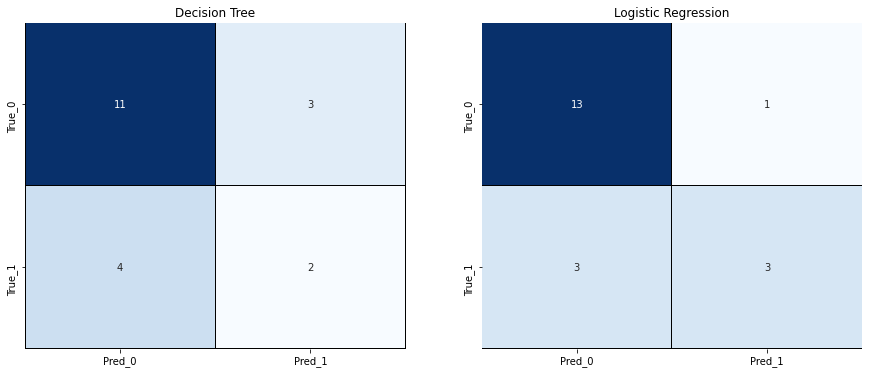

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(tree_confusion, cmap='Blues', annot=True, fmt='d', cbar=False, linewidths=0.2,
           linecolor='black', xticklabels=['Pred_0', 'Pred_1'], 
            yticklabels=['True_0', 'True_1'], ax=ax[0])
ax[0].set(title='Decision Tree')

sns.heatmap(logistic_confusion, cmap='Blues', annot=True, fmt='d', cbar=False, linewidths=0.2,
           linecolor='black', xticklabels=['Pred_0', 'Pred_1'], 
            yticklabels=['True_0', 'True_1'], ax=ax[1])
ax[1].set(title='Logistic Regression')

plt.show()

In [12]:
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.79      0.76        14
         1.0       0.40      0.33      0.36         6

    accuracy                           0.65        20
   macro avg       0.57      0.56      0.56        20
weighted avg       0.63      0.65      0.64        20



In [13]:
print(classification_report(y_test, logistic_y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87        14
         1.0       0.75      0.50      0.60         6

    accuracy                           0.80        20
   macro avg       0.78      0.71      0.73        20
weighted avg       0.79      0.80      0.79        20



### Plot Tree

In [17]:
tree_pipe.get_params().get('steps')[1][1]

DecisionTreeClassifier()

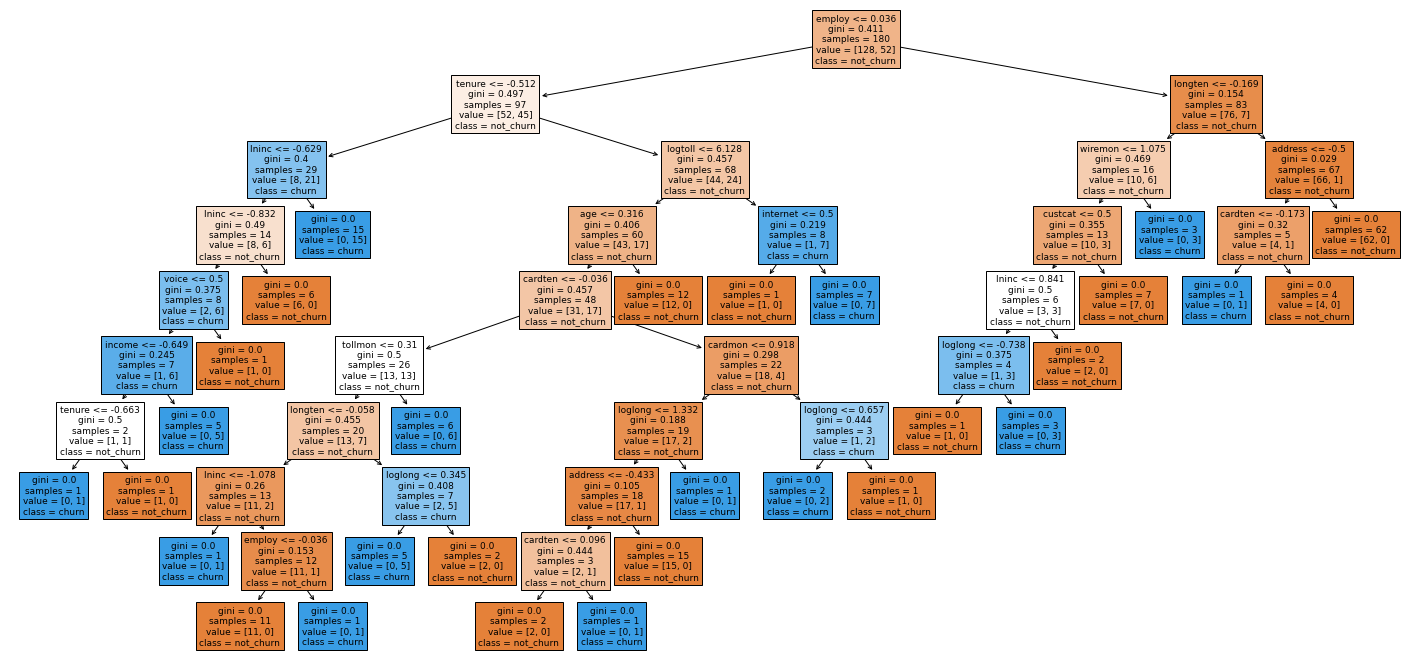

In [23]:
plt.figure(figsize=(25, 12))
plot_tree(tree_pipe.get_params().get('steps')[1][1], filled=True, feature_names=X_train.columns, class_names=['not_churn', 'churn']);

### Tuning

In [60]:
params = {'max_depth': 5,
          "min_samples_split": 40,
         "min_samples_leaf": 20,
         'max_features': 15}

tree_pipe = Pipeline([('scaler', RobustScaler()), ('decision_tree', DecisionTreeClassifier(**params))])
tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('decision_tree',
                 DecisionTreeClassifier(max_depth=5, max_features=15,
                                        min_samples_leaf=20,
                                        min_samples_split=40))])

In [61]:
tree_y_pred = tree_pipe.predict(X_test)

In [62]:
tree_confusion = confusion_matrix(y_test, tree_y_pred)

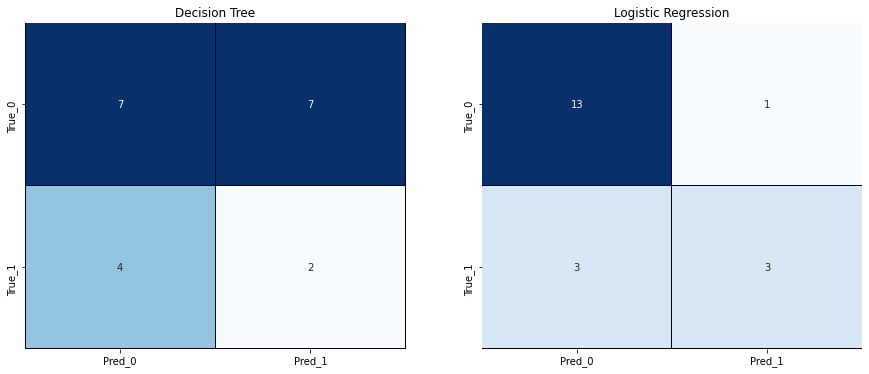

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(tree_confusion, cmap='Blues', annot=True, fmt='d', cbar=False, linewidths=0.2,
           linecolor='black', xticklabels=['Pred_0', 'Pred_1'], 
            yticklabels=['True_0', 'True_1'], ax=ax[0])
ax[0].set(title='Decision Tree')

sns.heatmap(logistic_confusion, cmap='Blues', annot=True, fmt='d', cbar=False, linewidths=0.2,
           linecolor='black', xticklabels=['Pred_0', 'Pred_1'], 
            yticklabels=['True_0', 'True_1'], ax=ax[1])
ax[1].set(title='Logistic Regression')

plt.show()

In [64]:
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.50      0.56        14
         1.0       0.22      0.33      0.27         6

    accuracy                           0.45        20
   macro avg       0.43      0.42      0.41        20
weighted avg       0.51      0.45      0.47        20



In [65]:
print(classification_report(y_test, logistic_y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87        14
         1.0       0.75      0.50      0.60         6

    accuracy                           0.80        20
   macro avg       0.78      0.71      0.73        20
weighted avg       0.79      0.80      0.79        20



### Plot Tree

In [66]:
tree_pipe.get_params().get('steps')[1][1]

DecisionTreeClassifier(max_depth=5, max_features=15, min_samples_leaf=20,
                       min_samples_split=40)

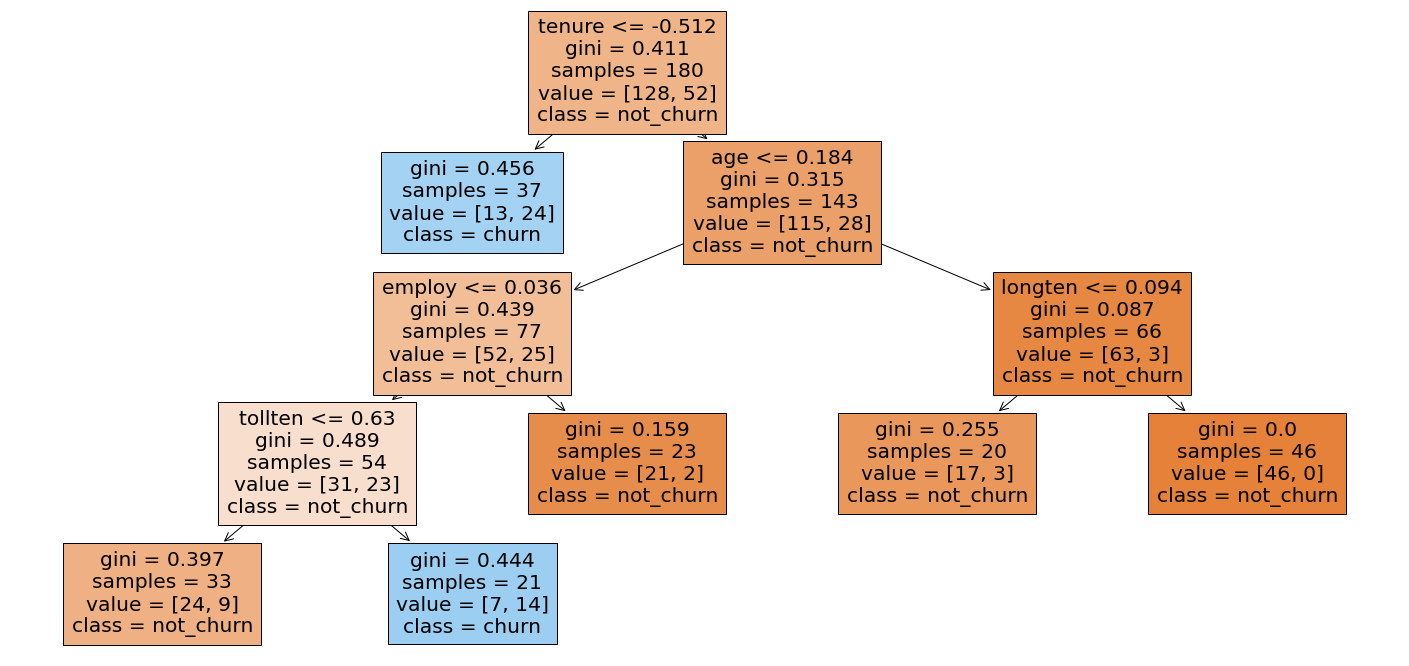

In [67]:
plt.figure(figsize=(25, 12))
plot_tree(tree_pipe.get_params().get('steps')[1][1], filled=True, feature_names=X_train.columns, class_names=['not_churn', 'churn']);